In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
data=pd.read_csv("movie_metadata.csv")

In [12]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [13]:
data.shape

(5043, 28)

In [14]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

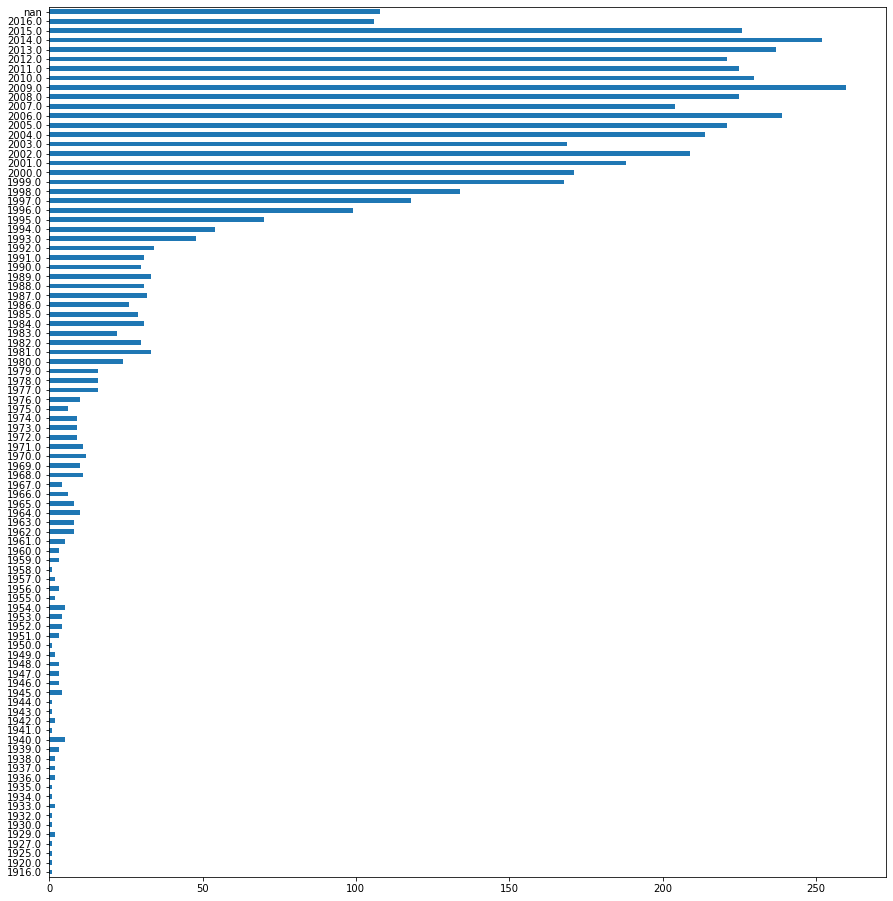

In [15]:
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [16]:
(data.movie_title=='Toy Story\xa0').sum() 

1

In [17]:
data=data.loc[:,['director_name',  'actor_1_name','actor_2_name','actor_3_name'
        ,'genres',
       'movie_title' ]]

In [18]:
data.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [19]:
data['director_name']=data['director_name'].replace(np.nan,'unknown')
data['actor_1_name']=data['actor_1_name'].replace(np.nan,'unknown')
data['actor_2_name']=data['actor_2_name'].replace(np.nan,'unknown')
data['actor_3_name']=data['actor_3_name'].replace(np.nan,'unknown')


In [20]:
data['genres']=data['genres'].replace('|',' ')

In [21]:
data['movie_title']=data['movie_title'].str.lower()

In [22]:
data['movie_title'][1]

"pirates of the caribbean: at world's end\xa0"

In [23]:
data['movie_title']=data['movie_title'].apply(lambda x : x[:-1])

In [24]:
data['movie_title'][1]

"pirates of the caribbean: at world's end"

In [26]:
credits=pd.read_csv('credits.csv')

In [27]:
meta=pd.read_csv('movies_metadata.csv')

In [28]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [29]:
meta['release_date']=pd.to_datetime(meta['release_date'],errors='coerce')

In [30]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [31]:
meta['year']=meta['release_date'].dt.year

In [32]:
meta['year'].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

In [33]:
new_meta=meta.loc[meta.year==2017,
['genres','id','title','year']]

In [34]:
new_meta

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0


In [35]:
new_meta['id']=new_meta['id'].astype(int)

In [36]:
data=pd.merge(new_meta,credits,on='id')

In [37]:
pd.set_option('display.max_colwidth',75)

In [38]:
data

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '..."
...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', '..."
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'ge..."
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', 'gend..."
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '577809adc3...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', 'gend..."


In [39]:
pip install ast 


  Using cached AST-0.0.2.tar.gz (19 kB)

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\DELL\AppData\Local\Programs\Python\Python37\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-yh01fxkh\\ast\\setup.py'"'"'; __file__='"'"'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-install-yh01fxkh\\ast\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\DELL\AppData\Local\Temp\pip-pip-egg-info-kl7bngdh'
         cwd: C:\Users\DELL\AppData\Local\Temp\pip-install-yh01fxkh\ast\
    Complete output (7 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\DELL\AppData\Local\Temp\pip-install-yh01fxkh\ast\setup.py", line 6, in <module>
        README = codecs.open(os.path.join(here, 'AST/README'), enco

In [40]:
import ast

In [41]:
data['genres']=data['genres'].map(lambda x:ast.literal_eval(x))
data['cast']=data['cast'].map(lambda x:ast.literal_eval(x))
data['crew']=data['crew'].map(lambda x:ast.literal_eval(x))

In [42]:
data['genres'].dtypes

dtype('O')

In [43]:
def make_genersList(x):
    gen=[]
    st=" "
    for i in x:
        if i.get('name')=='Science Fiction':
            scifi='Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen==[]:
        return np.NaN
    else:
        return(st.join(gen))

In [44]:
data['genres_list']=data['genres'].map(lambda x:make_genersList(x))

In [45]:
data['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

In [46]:
def get_actor1(x):
    casts=[]
    for  i in x:
        casts.append(i.get('name'))
    if casts==[]:
        return np.NaN 
    else:
        return (casts[0])

In [47]:
data['actor_1_name']=data['cast'].map(lambda x: get_actor1(x))

In [48]:
def get_actor2(x):
    casts=[]
    for  i in x:
        casts.append(i.get('name'))
    if casts==[] or len(casts)<=1:
        return np.NaN 
    else:
        return (casts[1])


In [49]:
data['actor_1_name']=data['cast'].map(lambda x: get_actor2(x))

In [50]:
def get_actor3(x):
    casts=[]
    for  i in x:
        casts.append(i.get('name'))
    if casts==[] or len(casts)<=2:
        return np.NaN 
    else:
        return (casts[2])

In [51]:
data['actor_3_name']=data['cast'].map(lambda x: get_actor3(x))

In [52]:
def directors(x):
    dt=[]
    st=" "
    for  i in x:
        if i.get('job')=='Director':
            dt.append(i.get('name'))
    if dt==[]:
        return np.NaN
    else:
        return (st.join(dt))

TypeError: 'DataFrame' object is not callable

In [53]:
data['director_name']=data['crew'].map(lambda x:directors(x))


In [54]:
data['director_name']

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

In [55]:
data.columns

Index(['genres', 'id', 'title', 'year', 'cast', 'crew', 'genres_list',
       'actor_1_name', 'actor_3_name', 'director_name'],
      dtype='object')

In [56]:
movie=data.loc[:,[ 'director_name','actor_1_name', 'actor_2_name', 'actor_3_name',
 'genres_list','title']]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['actor_2_name'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [57]:
movie9

NameError: name 'movie9' is not defined

In [58]:
movie.isna().sum()

NameError: name 'movie' is not defined

In [59]:
movie=movie.dropna(how='any')

NameError: name 'movie' is not defined

In [60]:
movie=movie.rename(columns={'genres_list':'genres'})
movie=movie.rename(columns={'title':'movie_title'})

NameError: name 'movie' is not defined

In [61]:
movie


NameError: name 'movie' is not defined

In [62]:
movie['movie_title']=movie['movie_title'].str.lower()

NameError: name 'movie' is not defined

In [63]:
movie['comb']=movie['actor_1_name']+' '+movie['actor_2_name']+' '+movie['actor_3_name']+' '+movie['director_name']+' '+movie['genres']

NameError: name 'movie' is not defined

In [64]:
movie

NameError: name 'movie' is not defined

In [65]:
old=pd.read_csv("data.csv")

In [66]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


In [67]:
new=old.append(movie)

NameError: name 'movie' is not defined

In [68]:
new.shape,movie.shape

NameError: name 'new' is not defined

In [69]:
new

NameError: name 'new' is not defined

In [70]:
new.drop_duplicates(subset="movie_title",keep='last',inplace=True)

NameError: name 'new' is not defined

In [71]:
new.to_csv('new_data.csv',index=False)

NameError: name 'new' is not defined

SyntaxError: invalid syntax (<ipython-input-165-fa3980bc165b>, line 1)

In [72]:
import  lxml

In [73]:
link="https://en.wikipedia.org/wiki/List_of_American_films_of_2018"


In [74]:
df1=pd.read_html(link,header=0)[2]
df2=pd.read_html(link,header=0)[3]
df3=pd.read_html(link,header=0)[4]
df4=pd.read_html(link,header=0)[5]


In [75]:
df=df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [76]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2]
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,[3]
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",[4]
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",[5]
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",[6]
...,...,...,...,...,...,...
263,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",[162]
264,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",[136]
265,DECEMBER,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",[223]
266,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",[256]


In [79]:
pip install tmdbv3api

Note: you may need to restart the kernel to use updated packages.


In [80]:
from tmdbv3api import TMDb
import json
import requests
tmdb=TMDb()
tmdb.api_key='5492165c61b1a21c06eb3a3b578a6339'


In [90]:
from tmdbv3api import Movie
tmdb_movie=Movie()
def get_genre(x):
    genres=[]
    result=tmdb_movie.search(x)
    movie_id=result[0].id 
    response=requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json=response.json()
    if data_json['genres']:
     genre_str=" "
     for i in range(0,len(data_json['genres'])):
         genres.append(data_json['genres'][i]['name'])
         return genre_str.join(genres)
    else:
        np.NaN   

In [91]:
df['Genre']=df['Title'].map(lambda x:get_genre(str(x)))

In [92]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,Genre
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2],Mystery
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,[3],Thriller
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",[4],Action
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",[5],Drama
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",[6],Action
...,...,...,...,...,...,...,...
263,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",[162],Mystery
264,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",[136],Thriller
265,DECEMBER,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",[223],Drama
266,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",[256],Thriller


In [93]:
df_2018=df[['Title','Cast and crew','Genre']]


In [114]:
def get_director(x):
    if "(director)" in x:
        return x.split("(director)")[0]
    elif "(directors)" in x:
        return x.split("(directors)")[0]
    else:
        return x.split("(directors/screenplay)")[0]

In [115]:
df_2018['director_name']=df_2018['Cast and crew'].map(lambda x:get_director(x))

In [116]:
def get_actor1(x):
    return((x.split("screenplay),")[-1]).split(" ,")[0])

In [117]:
df_2018['actor_1_name']=df_2018['Cast and crew'].map(lambda x:get_actor1(x))

In [118]:
def get_actor2(x):
    if len((x.split("screenplay),")[-1]).split(" ,"))<2:
        return np.NaN
    else:
        return(x.split("screenplay),")[-1]).split(" ,")[1]

df_2018['actor_2_name']=df_2018['Cast and crew'].map(lambda x:get_actor2(x))

In [121]:
def get_actor3(x):
    if len((x.split("screenplay),")[-1]).split(" ,"))<3:
        return np.NaN
    else:
        return(x.split("screenplay),")[-1]).split(" ,")[2]

df_2018['actor_3_name']=df_2018['Cast and crew'].map(lambda x:get_actor2(x))

In [122]:
df_2018

,Title,Cast and crew,Genre,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Mystery,Adam Robitel,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",NaN,NaN
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,Thriller,Lauren Wolkstein,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenpl...,NaN,NaN
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",Action,Simon West,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); D...",NaN,NaN
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",Drama,Warwick Thornton,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay...",NaN,NaN
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",Action,Jaume Collet-Serra,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screen...",NaN,NaN
...,...,...,...,...,...,...,...
263,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Mystery,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...","Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",NaN,NaN
264,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Thriller,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...","Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",NaN,NaN
265,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama,Mimi Leder,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",NaN,NaN
266,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",Thriller,Karyn Kusama,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole K...",NaN,NaN


In [127]:
#do same for all movies same function like 2019,2020
#creating model


In [128]:

pip install nltk

Using legacy 'setup.py install' for nltk, since package 'wheel' is not installed.
    Running setup.py install for nltk: started
    Running setup.py install for nltk: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [129]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

In [130]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [132]:
dataset = pd.read_csv('reviews.txt',sep = '\t', names =['Reviews','Comments'])

In [133]:
stopset = set(stopwords.words('english'))

In [134]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)

In [135]:
X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews
pickle.dump(vectorizer, open('tranform.pkl', 'wb'))

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [137]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [138]:
accuracy_score(y_test,clf.predict(X_test))*100

97.47109826589595

In [139]:
clf = naive_bayes.MultinomialNB()
clf.fit(X,y)

MultinomialNB()

In [140]:
accuracy_score(y_test,clf.predict(X_test))*100

98.77167630057804